# 6.5: Unsupervised Machine Learning: Clustering

### This script contains the following:

#### 1. Importing libraries
#### 2. Elbow Technique
#### 3. Kmeans Clustering
#### 4. Exporting

## 1. Importing Libraries

In [1]:
# Importing Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [2]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
path = r'C:\Users\Brichaelle\Flavors of Cocoa'

In [4]:
df = pd.read_csv(os.path.join(path, 'Data', 'prepared data', 'cleaned_sets.csv'), index_col = False)

In [8]:
df.shape

(1795, 9)

In [9]:
df.head()

,Company (Maker-if known),Specific Bean Origin or Bar Name,REF,Review Date,Cocoa Percent,Company Location,Rating,Bean Type,Broad Bean Origin
0,A. Morin,Agua Grande,1876,2016,63,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70,France,3.50,,Peru


## 2. Elbow Technique

In [14]:
# Subset of variables for kmeans

df_2 = df[['Cocoa Percent', 'Rating']]

In [15]:
df_2

,Cocoa Percent,Rating
0,63,3.75
1,70,2.75
2,70,3.00
3,70,3.50
4,70,3.50
...,...,...
1790,70,3.75
1791,65,3.00
1792,65,3.50
1793,62,3.25


In [11]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [16]:
score = [kmeans[i].fit(df_2).score(df_2) for i in range(len(kmeans))] # Creates a score that represents a rate of variation for the given cluster option.

score

C:\Users\Brichaelle\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Brichaelle\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Brichaelle\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Brichaelle\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Brichaelle\anaconda3\Lib\si

[-71958.74045961008,
 -36082.154696885096,
 -18919.067490857236,
 -10846.206690691783,
 -6962.292682045124,
 -4695.590750027435,
 -3255.754711909142,
 -2451.330029198721,
 -1816.884298166578]

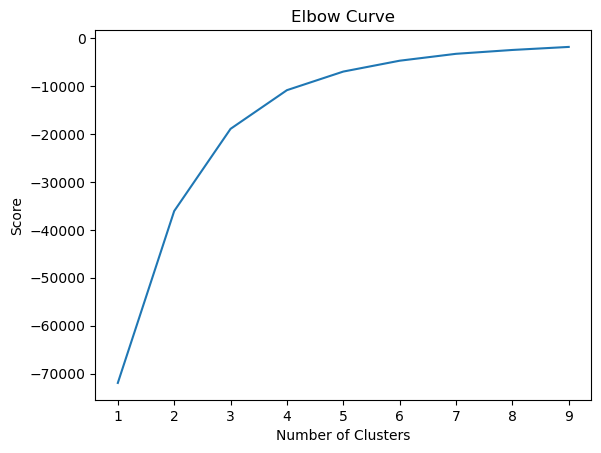

In [17]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

#### While the chart doesn't have a distinct break before smoothing out, in prior exercises, 3 groups/clusters work best with this dataset

## 3. K-means Clustering

In [19]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 3) 

In [20]:
# Fit the k-means object to the data.

kmeans.fit(df_2)

C:\Users\Brichaelle\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [21]:
df['clusters'] = kmeans.fit_predict(df_2)

C:\Users\Brichaelle\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [23]:
df.head()

,Company (Maker-if known),Specific Bean Origin or Bar Name,REF,Review Date,Cocoa Percent,Company Location,Rating,Bean Type,Broad Bean Origin,clusters
0,A. Morin,Agua Grande,1876,2016,63,France,3.75,,Sao Tome,2
1,A. Morin,Kpime,1676,2015,70,France,2.75,,Togo,0
2,A. Morin,Atsane,1676,2015,70,France,3.00,,Togo,0
3,A. Morin,Akata,1680,2015,70,France,3.50,,Togo,0
4,A. Morin,Quilla,1704,2015,70,France,3.50,,Peru,0


In [24]:
df['clusters'].value_counts()

0    1339
2     271
1     185
Name: clusters, dtype: int64

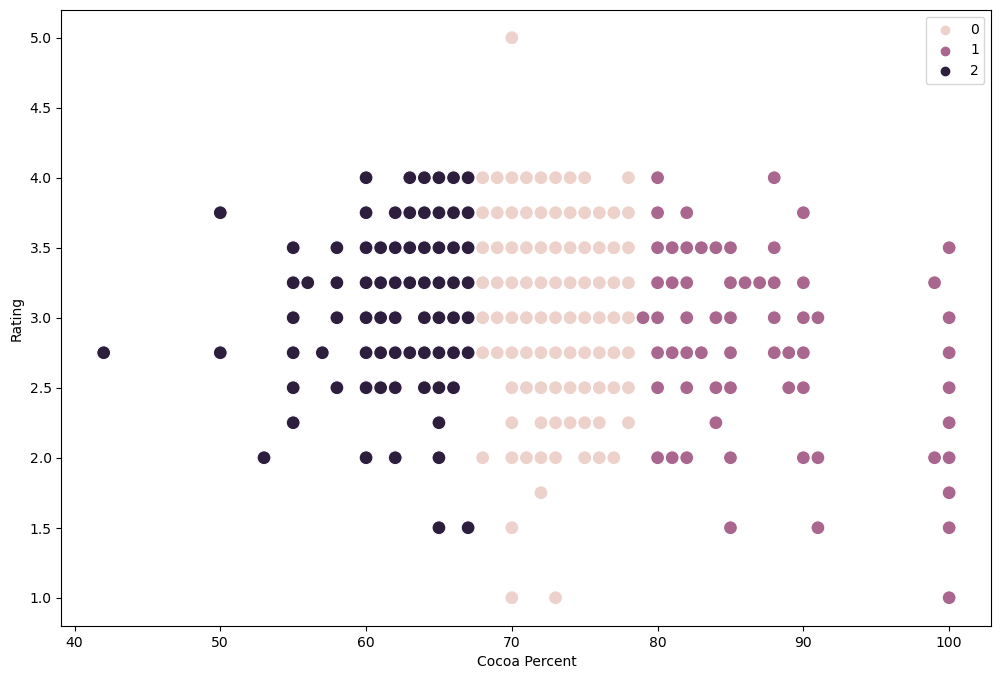

In [25]:
# Plot the clusters for the "Price per Unit" and "D.metro" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Cocoa Percent'], y=df['Rating'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Cocoa Percent') # Label x-axis.
plt.ylabel('Rating') # Label y-axis.
plt.show()

#### the same clusters present here, also represent the high, low and middle rating groups previously found. The attributes remain the same, chocolate percentage does not determine the rating

In [27]:
df.loc[df['clusters'] == 2, 'cluster'] = 'dark purple'
df.loc[df['clusters'] == 1, 'cluster'] = 'purple'
df.loc[df['clusters'] == 0, 'cluster'] = 'pink'

In [28]:
df.groupby('cluster').agg({'Cocoa Percent':['mean', 'median'], 
                           'Rating':['mean', 'median']})

Cocoa Percent           Rating       
                     mean median      mean median
cluster                                          
dark purple     62.856089   64.0  3.159594   3.25
pink            71.681852   70.0  3.229089   3.25
purple          84.816216   82.0  2.912162   3.00

#### Findings:
- Higher percent cocoa has a lower mean which could be a result of less ratings in that cluster
- the clusters are all similar in numbers due to the relationship or the lack thereof of the variables

### The results show that some other variables would be needed to show other more viable relationships in how consumers appreciate their chocolate

## 4. Exporting

In [29]:
df.to_csv(os.path.join(path, 'Data','prepared data', 'kmeans_analysis.csv'))